<img height="45px" src="https://colab.research.google.com/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px">

<h1>Welcome to Colaboratory!</h1>

Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud.

With Colaboratory you can write and execute code, save and share your analyses, and access powerful computing resources, all for free from your browser.

In [0]:
"""
Imports for PyTorch
"""
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch import autograd
from torchvision.transforms import transforms
#from fmnist_pytorch import *
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from torch.utils.data import Dataset

In [0]:
"""
Define some functions for visualizations and a CNN for classification. The CNN is loosely based off VGG networks
"""

def imshow(img):
	img = img[0] * 90.13 + 82.34
	npimg = img.numpy()
	plt.imshow(Image.npimg)
	plt.show()

class Net(nn.Module):
	def __init__(self):
		super(Net, self).__init__()
		self.conv_1 = nn.Conv2d(1, 64, 4)
		self.relu_1 = nn.ReLU()
		self.relu_3 = nn.ReLU()
		self.maxpool_1 = nn.MaxPool2d((2, 2))
		self.dropout_1 = nn.Dropout(p=0.5)
		self.batchnorm_1 = nn.BatchNorm2d(1)
    
		self.conv_1_2 = nn.Conv2d(64, 128, 2)
    
		self.conv_2 = nn.Conv2d(128, 256, 2)
		self.relu_2 = nn.ReLU()
		self.dropout_2 = nn.Dropout(p=0.5)
		self.batchnorm_2 = nn.BatchNorm2d(64)

		self.fc_1 = nn.Linear(6400, 512)
		self.dropout_3 = nn.Dropout(p=0.5)
		self.fc_2 = nn.Linear(512, 128)
		self.batchnorm_3 = nn.BatchNorm1d(128) 	# Fix this!
		self.fc_3 = nn.Linear(128, 4)
	def forward(self, x):
		def flatten(x):
			return x.view(x.size(0), -1)
		x = self.relu_1(self.conv_1(x))
		x = self.dropout_1(self.maxpool_1(x))
		x = self.batchnorm_2(x)
		x = self.relu_2(self.conv_1_2(x))
		x = self.relu_2(self.conv_2(x))
		x = self.dropout_2(self.maxpool_1(x))
		x = self.fc_3(self.batchnorm_3(self.relu_1(self.fc_2(self.dropout_3(self.relu_1(self.fc_1(flatten(x))))))))
		return x

In [0]:
import matplotlib

In [0]:
"""
Defined custome Dataset class for the given data. The elements looked very similar to another dataset F-MNIST
"""
from torch.utils.data import Dataset
import torch
import numpy as np
import pickle
from torchvision import transforms
from PIL import Image

class fmnist(Dataset):
	def __init__(self, height, width,  mode, indices):
		"""
		Return raw labels and training data(numpy)
		"""
		self.class_to_index = {0:0, 2:1, 3:2, 6:3}
		with open('train_label.pkl', 'rb') as f:
			self.labels = np.asarray(pickle.load(f))

		with open('train_image.pkl', 'rb') as f:
			self.data = np.asarray(pickle.load(f))
    # Randomize data
		self.indices = indices
		self.data = self.data[indices]
		self.labels = self.labels[indices]
		
		if mode=='train':
			self.data = self.data[:6000]
			self.labels = self.labels[:6000]
			
		elif mode=='val':
			self.data = self.data[6000:7000]
			self.labels = self.labels[6000:7000]
      
		elif mode=='actual':
			with open('test_image.pkl', 'rb') as f:
				self.data = np.asarray(pickle.load(f))
			self.labels = self.labels

      
		elif mode=='test':
			self.data = self.data[7000:]
			self.labels = self.labels[7000:]

		self.label = []
		for i in self.labels:
			self.label.append(torch.tensor(self.class_to_index[i]))
		self.labels = self.label
		self.transforms = transforms
		self.height = height
		self.width = width

	def __getitem__(self, index):
		"""
		Return tensor objects 
		"""
		#print(self.labels)
		single_image_label = self.labels[index]

		# Read each 784 pixels and reshape the 1D array ([784]) to 2D array ([28,28]) 
		img_as_np = self.data[index].reshape((1, self.height, self.width))
		torch.set_default_dtype(torch.float64)
    
		# Transform image to tensor
		img_as_tensor = torch.from_numpy(img_as_np)
		img_as_tensor = img_as_tensor.sub_(82.3447)
		#img_as_tensor = img_as_tensor.div_(90.1352)		# Return image and the lab
		return (img_as_tensor, single_image_label)

	def __len__(self):
		return len(self.data) # of number of examples



In [0]:
import torchvision
from torchvision import transforms

In [9]:
print(torch.__version__)

1.0.1.post2


tensor([[[-82, -82, -82, -82, -82, -82, -82, -82, -82, -82, -82, -82, -27,  34,
          -51,   3, 117, -82, -82, -82, -82, -82, -82, -82, -82, -82, -82, -82],
         [-82, -82, -82, -82, -82, -82, -82, -82, -82, -82, -82, -68,  27,  49,
          156, 128,  21, -58, -82, -82, -82, -82, -82, -82, -82, -82, -82, -82],
         [-82, -82, -82, -82, -82, -82, -82, -82, -82, -58, -20, -25,  14,  80,
          165,  91, -25, -33, -25, -44, -81, -82, -82, -82, -82, -82, -82, -82],
         [-82, -82, -82, -82, -82, -82, -82, -46, -27, -12, -14, -47,  21,  75,
          -38, -47,  51, -47, -33, -22, -23, -34, -73, -82, -82, -82, -82, -82],
         [-82, -82, -82, -82, -82, -82,   6, -18, -14, -16, -27, -25, -36,  14,
           34,  -3, -20, -38, -18, -22, -25, -20,  -1, -60, -82, -82, -82, -82],
         [-82, -82, -82, -82, -82, -68,  80,   6, -44, -23,  -5, -12, -20, -12,
           -3, -33, -22, -25, -20, -27, -29, -20,  15,  -1, -82, -82, -82, -82],
         [-82, -82, -82, -82, -82,

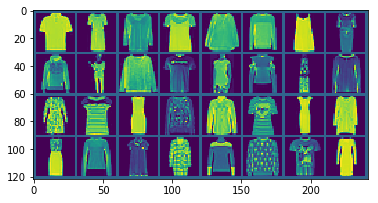

    0     2     1     0


In [45]:
"""
Initialize training units
"""
indices = np.arange(8000)
np.random.shuffle(indices)

trainset = fmnist(28, 28, 'train', indices)
valset = fmnist(28, 28, 'val', indices)
testset = fmnist(28, 28, 'test', indices)
actual_test = fmnist(28, 28, 'actual', indices)

trainloader = torch.utils.data.DataLoader(dataset=trainset, batch_size=32, shuffle=True, num_workers=2)
valloader = torch.utils.data.DataLoader(dataset=valset, batch_size=4, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(dataset=testset, batch_size=4, shuffle=True, num_workers=2)
actual_loader = torch.utils.data.DataLoader(dataset=actual_test, batch_size=4, num_workers=2)

classes = (0, 1, 2, 3)
a, b = trainset.__getitem__(0)
print(a, b)
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(labels)
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

device = torch.device("cuda:0")
use_cuda = True
net = Net()
net.to(device)
max_accuracy = 0
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [0]:
torch.cuda.is_available()
use_cuda=True

In [29]:
"""
Training loop
"""
device = torch.device("cuda:0")
use_cuda = True
net = Net()
net.cuda()
max_accuracy = 0
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=1e-3, momentum=0.9, weight_decay=1e-4)
#scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer)
for epoch in range(30):
		running_loss = 0
		for i, data in enumerate(trainloader, 0):
			inputs, labels = data
			inputs, labels = inputs.double().cuda(), labels.long().cuda()
			#print(labels, len(labels))

			optimizer.zero_grad()
			outputs = net(inputs)
			loss = criterion(outputs,labels)
			loss.backward()
			optimizer.step()
			#scheduler.step(loss)
			

			running_loss += loss.item()

			if i%50==49:
				print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
				running_loss = 0.0

				correct = 0
				total = 0
				with torch.no_grad():
					for data in valloader:
						x, y = data
						x, y = x.double().cuda(), y.long().cuda()

						outputs = net(x)
						_, predicted = torch.max(outputs.data, 1)
						#print(predicted, y)
						#assert 1<0
						total += y.size(0)
						correct += (predicted == y).sum().item()

				max_accuracy = (100 * correct / total)
				print('Accuracy of the network on 1000 validation images: %d %%' % max_accuracy)

		torch.save({'epoch': epoch, 
					'model_state_dict': net.state_dict(), 
					'optimizer_state_dict': optimizer.state_dict(), 
					'loss': loss}, 'midas_%d' % epoch)

[1,    50] loss: 0.033
Accuracy of the network on 1000 validation images: 43 %
[1,   100] loss: 0.028
Accuracy of the network on 1000 validation images: 49 %
[1,   150] loss: 0.025
Accuracy of the network on 1000 validation images: 56 %
[2,    50] loss: 0.021
Accuracy of the network on 1000 validation images: 60 %
[2,   100] loss: 0.021
Accuracy of the network on 1000 validation images: 58 %
[2,   150] loss: 0.020
Accuracy of the network on 1000 validation images: 60 %
[3,    50] loss: 0.020
Accuracy of the network on 1000 validation images: 61 %
[3,   100] loss: 0.018
Accuracy of the network on 1000 validation images: 61 %
[3,   150] loss: 0.018
Accuracy of the network on 1000 validation images: 63 %
[4,    50] loss: 0.017
Accuracy of the network on 1000 validation images: 62 %
[4,   100] loss: 0.018
Accuracy of the network on 1000 validation images: 62 %
[4,   150] loss: 0.018
Accuracy of the network on 1000 validation images: 63 %
[5,    50] loss: 0.017
Accuracy of the network on 10

In [55]:
"""
Record results
"""
output = []
for data in actual_loader:
  x, y = data
  x, y = x.double().cuda(), y.long().cuda()

  outputs = net(x)
  _, predicted = torch.max(outputs.data, 1)

  for i in predicted:
    if i==0:
      output.append(0)
    elif i==1:
      output.append(2)
    elif i==2:
      output.append(3)
    elif i==3:
      output.append(6)
  
print(output)
print(len(output))
import pandas as pd
df = pd.DataFrame(columns=('image_index', 'class'))
df['image_index'] = list(range(0, len(output)))
df['class'] = output
df.to_csv('final.csv')

[2, 2, 0, 6, 3, 0, 6, 2, 3, 0, 6, 0, 0, 0, 3, 6, 0, 3, 6, 2, 3, 0, 6, 2, 3, 0, 3, 0, 6, 0, 6, 3, 2, 0, 2, 0, 2, 3, 0, 3, 6, 0, 0, 3, 3, 6, 3, 0, 0, 2, 3, 6, 6, 0, 2, 2, 0, 3, 3, 3, 0, 3, 2, 3, 3, 6, 2, 6, 0, 3, 6, 2, 6, 2, 0, 6, 6, 2, 3, 3, 3, 0, 6, 0, 2, 3, 3, 0, 6, 3, 2, 3, 3, 3, 6, 0, 2, 3, 3, 6, 2, 6, 3, 3, 6, 0, 0, 2, 3, 6, 2, 0, 0, 3, 6, 6, 2, 0, 0, 3, 6, 3, 6, 0, 3, 6, 2, 2, 2, 0, 3, 2, 3, 2, 2, 0, 0, 2, 6, 0, 2, 0, 2, 6, 6, 3, 3, 2, 6, 6, 2, 3, 3, 3, 0, 6, 2, 6, 3, 2, 3, 6, 0, 2, 2, 0, 6, 2, 0, 2, 6, 3, 0, 3, 3, 6, 0, 3, 6, 2, 2, 0, 3, 3, 2, 0, 0, 2, 0, 3, 2, 0, 2, 0, 3, 3, 2, 6, 0, 6, 2, 2, 0, 0, 2, 6, 0, 2, 3, 6, 2, 0, 3, 0, 3, 2, 2, 2, 6, 0, 2, 3, 0, 6, 0, 2, 3, 2, 6, 3, 0, 2, 3, 0, 0, 6, 0, 2, 6, 0, 3, 0, 3, 2, 3, 0, 2, 3, 3, 0, 6, 2, 2, 6, 6, 0, 6, 6, 2, 0, 3, 6, 0, 2, 2, 6, 0, 2, 3, 6, 3, 0, 2, 3, 3, 2, 2, 2, 0, 3, 2, 6, 6, 3, 2, 3, 0, 6, 3, 0, 3, 2, 3, 2, 6, 0, 3, 0, 6, 3, 2, 6, 2, 3, 3, 6, 0, 0, 3, 3, 0, 0, 3, 2, 3, 2, 3, 6, 2, 0, 2, 0, 6, 3, 6, 0, 3, 2, 3, 6, 3, 2, 0, 